In [1]:
pwd

'c:\\Users\\adrianishak.duda\\OneDrive - Hexagon\\Documents\\Experiment\\Python\\ComputerVision'

# Importing OS module

In [2]:
import os
HOME = os.getcwd()
print('HOME:', HOME)

HOME: c:\Users\adrianishak.duda\OneDrive - Hexagon\Documents\Experiment\Python\ComputerVision


In [3]:
isExists = os.path.exists(HOME + '\Dataset')
print('isExists:', isExists)
if not isExists:
    print('Laden Sie sich die Bilddateien von der Moodle Seite herunter')
else:
    print('Verzeichnis vorhanden')

isExists: True
Verzeichnis vorhanden


In [4]:
imageFilesPath = HOME + '\Dataset\PNGImages'
imageFiles = os.listdir(imageFilesPath)
print('imageFiles:', imageFiles)

numImages = len(imageFiles)
print('numImages:', numImages)

print(imageFiles[0:5:2])

imageFiles: ['FudanPed00001.png', 'FudanPed00002.png', 'FudanPed00003.png', 'FudanPed00004.png', 'FudanPed00005.png', 'FudanPed00006.png', 'FudanPed00007.png', 'FudanPed00008.png', 'FudanPed00009.png', 'FudanPed00010.png', 'FudanPed00011.png', 'FudanPed00012.png', 'FudanPed00013.png', 'FudanPed00014.png', 'FudanPed00015.png', 'FudanPed00016.png', 'FudanPed00017.png', 'FudanPed00018.png', 'FudanPed00019.png', 'FudanPed00020.png', 'FudanPed00021.png', 'FudanPed00022.png', 'FudanPed00023.png', 'FudanPed00024.png', 'FudanPed00025.png', 'FudanPed00026.png', 'FudanPed00027.png', 'FudanPed00028.png', 'FudanPed00029.png', 'FudanPed00030.png', 'FudanPed00031.png', 'FudanPed00032.png', 'FudanPed00033.png', 'FudanPed00034.png', 'FudanPed00035.png', 'FudanPed00036.png', 'FudanPed00037.png', 'FudanPed00038.png', 'FudanPed00039.png', 'FudanPed00040.png', 'FudanPed00041.png', 'FudanPed00042.png', 'FudanPed00043.png', 'FudanPed00044.png', 'FudanPed00045.png', 'FudanPed00046.png', 'FudanPed00047.png', 

# OpenCV Stuff

In [5]:
import cv2

fileName = imageFilesPath + '\\' + imageFiles[0]
print('fileName:', fileName)
imgReference = cv2.imread(fileName)
img2Show = cv2.cvtColor(imgReference, cv2.COLOR_BGR2RGB)
print('img2Show.shape:', img2Show)

fileName: c:\Users\adrianishak.duda\OneDrive - Hexagon\Documents\Experiment\Python\ComputerVision\Dataset\PNGImages\FudanPed00001.png
img2Show.shape: [[[211 200 182]
  [210 199 181]
  [212 201 183]
  ...
  [143  96  78]
  [146  99  81]
  [148 101  83]]

 [[179 168 150]
  [173 162 144]
  [170 159 141]
  ...
  [126  79  61]
  [128  81  63]
  [128  81  63]]

 [[204 193 175]
  [194 183 165]
  [188 177 159]
  ...
  [130  83  65]
  [131  84  66]
  [130  83  65]]

 ...

 [[226 220 220]
  [217 211 211]
  [211 205 205]
  ...
  [183 183 183]
  [184 184 184]
  [185 185 185]]

 [[231 225 225]
  [219 213 213]
  [210 204 204]
  ...
  [187 187 187]
  [187 187 187]
  [186 186 186]]

 [[225 219 219]
  [227 221 221]
  [215 209 209]
  ...
  [190 190 190]
  [190 190 190]
  [187 187 187]]]


# Matplotlib

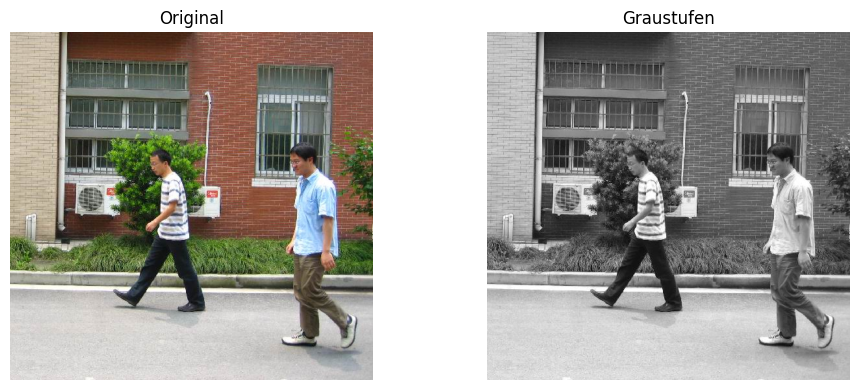

In [6]:
import matplotlib.pyplot as plt
# convert into grey step image
imgGray = cv2.cvtColor(imgReference, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].imshow(img2Show); axes[0].set_title('Original'); axes[0].axis('off')
axes[1].imshow(imgGray, cmap='gray'); axes[1].set_title('Graustufen'); axes[1].axis('off')
plt.tight_layout()

# OpenCV HoG Descriptor
Histogram of Oriented Gradients
Detection of Fussgaenger

Alle normalisierten Histogramme werden zu einem großen Feature-Vektor zusammengefügt – das ist der eigentliche HoG Descriptor.

rects: [[368 154 191 382]
 [161 119 184 368]
 [345   2 131 261]
 [242 308  72 143]]
weights: [1.74888936 0.28127424 0.48322554 0.67950867]
#rects: 4


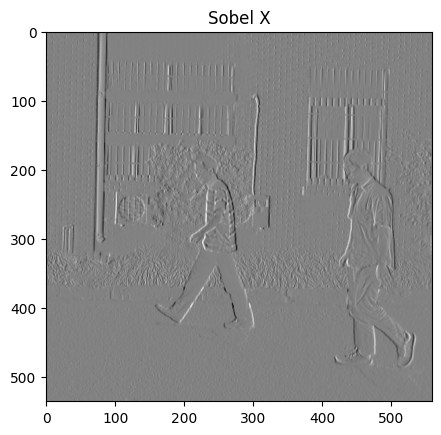

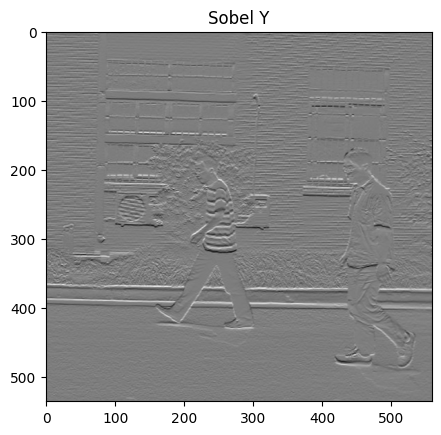

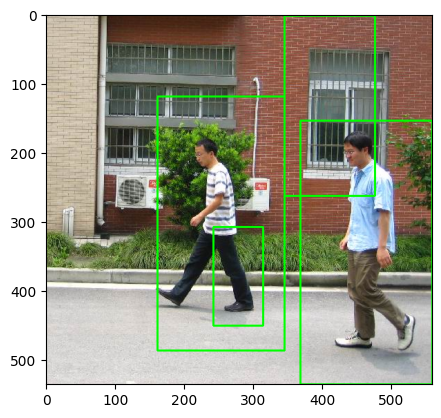

In [7]:
# Gradienten berechnen
imgSobelX = cv2.Sobel(imgGray, cv2.CV_64F, 1, 0)
imgSobelY = cv2.Sobel(imgGray, cv2.CV_64F, 0, 1)

plt.figure()
plt.imshow(imgSobelX, cmap='gray')
plt.title("Sobel X")

plt.figure()
plt.imshow(imgSobelY, cmap='gray')
plt.title("Sobel Y")

# The R-HOG descriptor weighted by respectively the positive and the negative SVM weights
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
(rects, weights) = hog.detectMultiScale(imgGray, winStride=(4, 4),
    padding=(8, 8), scale=1.05)
print('rects:', rects)
print('weights:', weights)
print('#rects:', len(rects))
for (x, y, w, h) in rects:
    cv2.rectangle(img2Show, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.figure()
plt.imshow(img2Show)


# 10 pictures

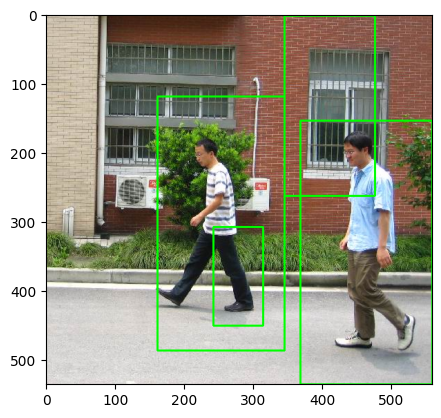

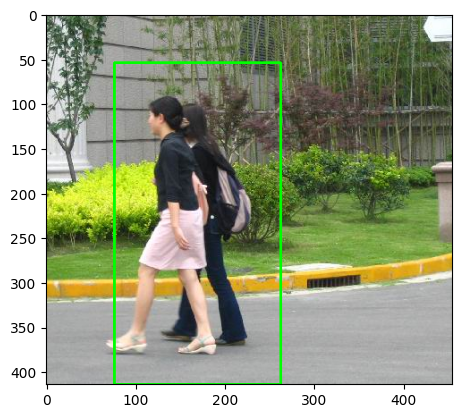

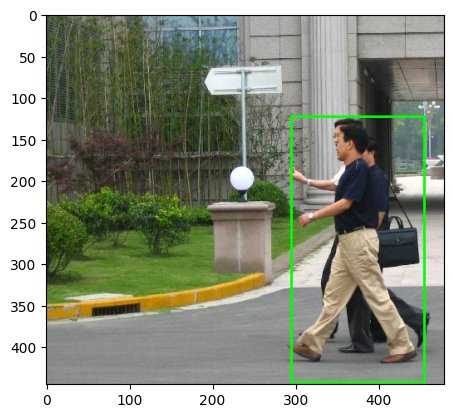

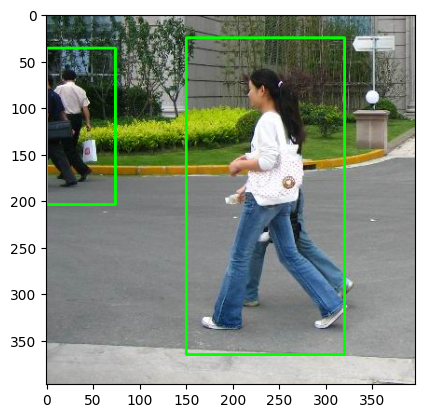

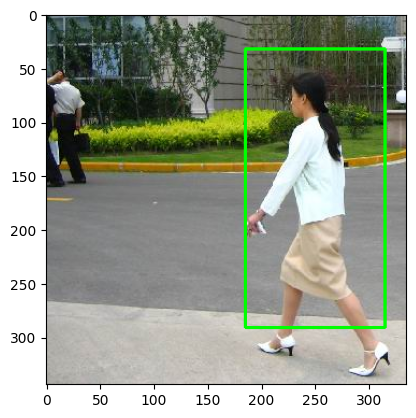

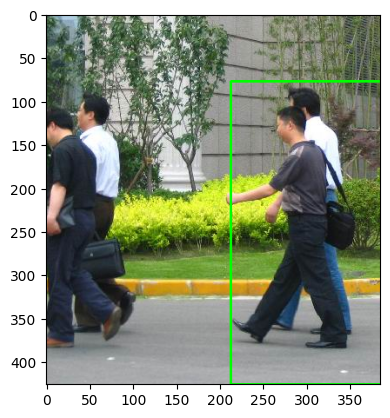

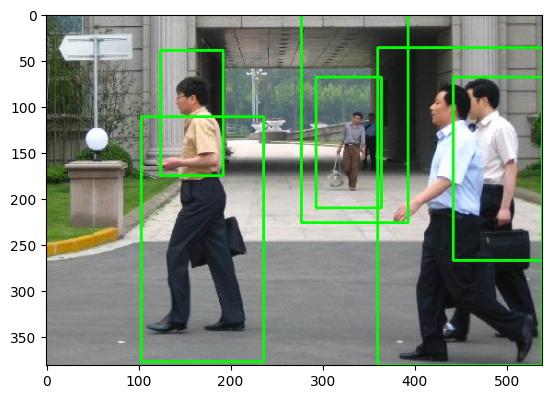

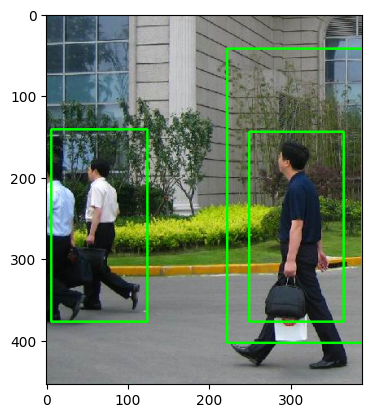

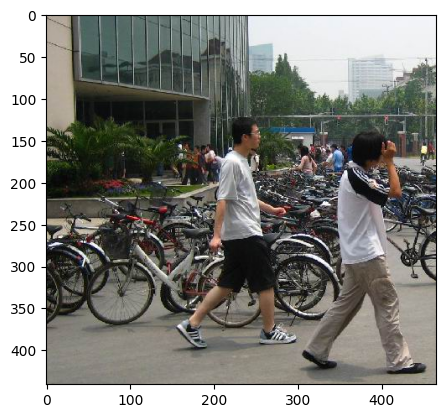

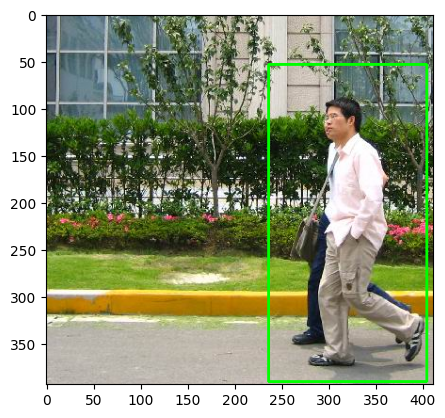

In [8]:
for i in range(10):
    fileName = imageFilesPath + '\\' + imageFiles[i]
    imgReference = cv2.imread(fileName)
    
    img2Show = cv2.cvtColor(imgReference, cv2.COLOR_BGR2RGB)
    imgGray = cv2.cvtColor(imgReference, cv2.COLOR_BGR2GRAY)

    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    (rects, weights) = hog.detectMultiScale(imgGray, winStride=(4, 4),
    padding=(8, 8), scale=1.05)
    
    for (x, y, w, h) in rects:
        cv2.rectangle(img2Show, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.figure()
    plt.imshow(img2Show)



301.8111877441406


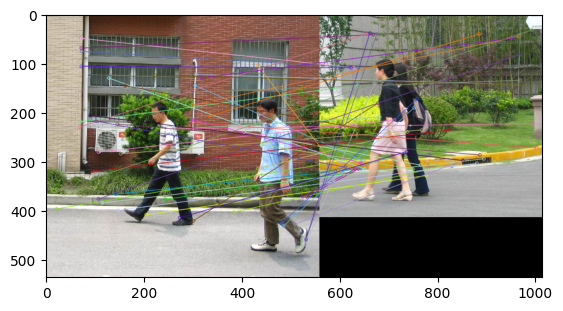

In [9]:
sift = cv2.SIFT_create()
imgReference0 = cv2.imread(imageFilesPath + '\\' + imageFiles[0])
imgReference1 = cv2.imread(imageFilesPath + '\\' + imageFiles[1])

imgGray0 = cv2.cvtColor(imgReference0, cv2.COLOR_BGR2GRAY)
imgGray1 = cv2.cvtColor(imgReference1, cv2.COLOR_BGR2GRAY)


keypoints_R, descriptor_R = sift.detectAndCompute(imgGray0, None)
keypoints_I, descriptor_I = sift.detectAndCompute(imgGray1, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptor_R, descriptor_I)
print(matches[0].distance)

matches = sorted(matches, key=lambda x: x.distance)
imgMatches = cv2.drawMatches(imgReference0, keypoints_R, imgReference1, keypoints_I, matches[:50], flags=2, outImg=None)
imgShow = cv2.cvtColor(imgMatches, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(imgShow)